# 04.로지스틱 회귀(Logistic Regression)

이번 챕터에서는 이진 분류를 수행하는 로지스틱 회귀에 대해서 알아보겠다.

## 01.로지스틱 회귀(Logistic Regression)

일상 속 풀고자하는 많은 문제 중에서는 두 개의 선택지 중에서 정답을 고르는 문제가 많다. 예를 들어 시험을 봤는데 이 시험 점수가 합격인지 불합격인지가 궁금할 수도 있고, 어떤 메일을 받았을 때 이게 정상 메일인지 스팸 메일인지를 분류하는 문제도 그렇다. 이렇게 둘 중 하나를 결정하는 문제를 **이진 분류(Binary Classification)**라고 한다. 그리고 이진 분류를 풀기 위한 대표적인 알고리즘으로 로지스틱 회귀(Logistic Regression)가 있다.

* **로지스틱 회귀는 알고리즘의 이름은 회귀이지만 실제로는 분류(Classification) 작업에 사용할 수 있다.**



### 1.이진 분류(Binary Classification)

학생들이 시험 성적에 따라서 합격, 불합격이 기재된 데이터가 있다고 가정해보자. 시험 성적이 $x$라면, 합불 결과는 $y$이다. 이 시험의 커트라인은 공개되지 않았는데 이 데이터로부터 특정 점수를 얻었을 때의 합격, 불합격 여부를 판정하는 모델을 만들고자 한다.

|score($x$)|result($y$)
|--|--
|45	|불합격
|50	|불합격
|55	|불합격
|60	|합격
|65	|합격
|70	|합격

위의 데이터에서 합격을 1, 불합격을 0이라고 하였을 때 그래프를 그려보면 아래와 같다.

<img src = 'https://wikidocs.net/images/page/22881/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80.PNG' width = 60%>

이러한 점들을 표현하는 그래프는 알파벳의 S자 형태로 표현된다. 이러한 $x$와 $y$의 관계를 표현하기 위해서는 $Wx + b$와 같은 직선 함수가 아니라 S자 형태로 표현할 수 있는 함수가 필요하다. 이런 문제에 직선을 사용할 경우 분류 작업이 잘 동작하지 않는다.

그래서 이번 로지스틱 회귀의 가설은 선형 회귀 때의 $H(x) = Wx + b$가 아니라, 위와 같이 S자 모양의 그래프를 만들 수 있는 어떤 특정 함수 $f$를 추가적으로 사용하여 $H(x) = f(Wx + b)$의 가설을 사용할 것이다. 그리고 위와 같이 S자 모양의 그래프를 그릴 수 있는 어떤 함수 $f$가 이미 널리 알려져 있다. 바로 시그모이드 함수이다.

### 2.시그모이드 함수(Sigmoid function)

위와 같이 S자 형태로 그래프를 그려주는 시그모이드 함수의 방정식은 아래와 같다.

$H(x) = sigmoid(Wx + b) = \frac{1}{1 + e^{-(Wx + b)}} = σ(Wx + b)$

선형 회귀에서는 최적의 $W$와 $b$를 찾는 것이 목표였다. 여기서도 마찬가지이다. 선형 회귀에서는 $W$가 직선의 기울기, $b$가 y절편을 의미했다. 그렇다면 여기에서는 $W$와 $b$가 함수의 그래프에 어떤 영향을 주는지 직접 그래프를 그려서 알아보겠다.

* **파이썬에서는 그래프를 그릴 수 있는 도구로서 Matplotlib을 사용할 수 있다.**

우선 Matplotlib과 Numpy를 임포트한다.

In [5]:
%matplotlib inline
import numpy as np # 넘파이 사용
import matplotlib.pyplot as plt # 맷플롯립 사용 
plt.style.use('seaborn-white')

Numpy를 사용하여 시그모이드 함수를 정의한다.

In [2]:
def sigmoid(x): # 시그모이드 함수 정의
    return 1 / (1 + np.exp(-x))

#### 1.W가 1이고 b가 0인 그래프

가장 먼저 $W$가 1이고, $b$가 0인 그래프를 그려보자.


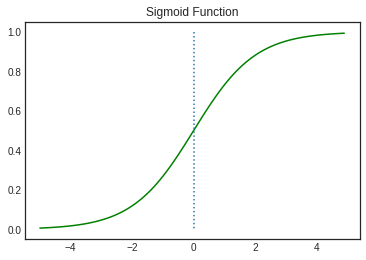

In [6]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0, 0], [1.0, 0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

위의 그래프를 통해 시그모이드 함수는 출력값을 0과 1사이의 값으로 조정하여 반환함을 알 수 있다. $x$가 0일 때 0.5의 값을 가진다. $x$가 매우 커지면 1에 수렴한다. 반면, $x$가 매우 작아지면 0에 수렴한다.



#### 2.W값의 변화에 따른 경사도의 변화

이제 $W$의 값을 변화시키고 이에 따른 그래프를 확인해보겠다.

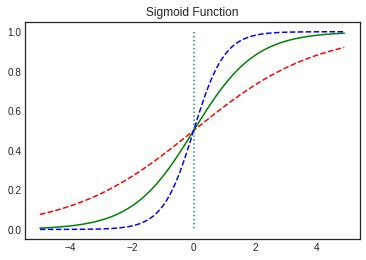

In [7]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5 * x)
y2 = sigmoid(x)
y3 = sigmoid(2 * x)

plt.plot(x, y1, 'r', linestyle = '--') # W의 값이 0.5일때
plt.plot(x, y2, 'g') # W의 값이 1일때
plt.plot(x, y3, 'b', linestyle = '--') # W의 값이 2일때
plt.plot([0, 0], [1.0, 0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

위의 그래프는 $W$의 값이 0.5일때 빨간색선, $W$의 값이 1일때는 초록색선, $W$의 값이 2일때 파란색선이 나오도록 하였다. 자세히 보면 $W$의 값에 따라 그래프의 경사도가 변하는 것을 볼 수 있다. 앞서 선형 회귀에서 가중치 $W$는 직선의 기울기를 의미했지만, 여기서는 그래프의 경사도를 결정한다. $W$의 값이 커지면 경사가 커지고 $W$의 값이 작아지면 경사가 작아진다.

#### 3.b값의 변화에 따른 좌, 우 이동

이제 $b$의 값에 따라서 그래프가 어떻게 변하는지 확인해보겠다.



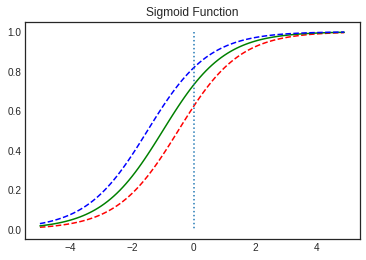

In [8]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x + 0.5)
y2 = sigmoid(x + 1)
y3 = sigmoid(x + 1.5)

plt.plot(x, y1, 'r', linestyle = '--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle = '--') # x + 1.5
plt.plot([0, 0], [1.0, 0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

위의 그래프는 $b$의 값에 따라서 그래프가 좌, 우로 이동하는 것을 보여준다.

#### 4.시그모이드 함수를 이용한 분류

시그모이드 함수는 입력값이 한없이 커지면 1에 수렴하고, 입력값이 한없이 작아지면 0에 수렴한다. **시그모이드 함수의 출력값은 0과 1 사이의 값을 가지는데** 이 특성을 이용하여 분류 작업에 사용할 수 있다. 예를 들어 임계값을 0.5라고 정해보겠다. 출력값이 0.5 이상이면 1(True), 0.5 이하면 0(False)으로 판단하도록 할 수 있다. 이를 확률이라고 생각하면 해당 레이블에 속할 확률이 50%가 넘으면 해당 레이블로 판단하고, 해당 레이블에 속할 확률이 50%보다 낮으면 아니라고 판단하는 것으로 볼 수 있다.



### 3.비용 함수(Cost function)

이제 로지스틱 회귀의 가설이 $H(x) = sigmoid(Wx + b)$인 것은 알았다. 이제 최적의 $W$와 $b$를 찾을 수 있는 비용 함수(cost function)를 정의해야 한다. 그런데 혹시 앞서 선형 회귀에서 배운 비용 함수인 평균 제곱 오차(Mean Square Error, MSE)를 로지스틱 회귀의 비용 함수로 그냥 사용하면 안 될까?

다음은 선형 회귀에서 사용했던 평균 제곱 오차의 수식이다.

$cost(W, b) = \frac{1}{n} \sum_{i=1}^{n} \left[y^{(i)} - H(x^{(i)})\right]^2$

위의 비용 함수 수식에서 가설은 이제 $H(x) = Wx + b$가 아니라 $H(x) = sigmoid(Wx + b)$이다. 그리고 이 비용 함수를 미분하면 선형 회귀때와 달리 다음의 그림과 유사한 심한 비볼록(non-convex) 형태의 그래프가 나온다.

<img src = 'https://wikidocs.net/images/page/22881/%EB%A1%9C%EC%BB%AC%EB%AF%B8%EB%8B%88%EB%A9%88.PNG' width = 60%>

위와 같은 그래프에 경사 하강법을 사용할 경우의 문제점은 경사 하강법이 오차가 최소값이 되는 구간에 도착했다고 판단한 그 구간이 실제 오차가 완전히 최소값이 되는 구간이 아닐 수 있다는 점이다. 사람이 등산 후에 산을 내려올 때도, 가파른 경사를 내려오다가 넓은 평지가 나오면 순간적으로 다 내려왔다고 착각할 수 있다. 하지만 실제로는 그곳이 다 내려온 것이 아니라 잠깐 평지가 나왔을 뿐이라면 길을 더 찾아서 더 내려가야 할 것이다. 모델도 마찬가지로 실제 오차가 최소가 되는 구간을 찾을 수 있도록 도와주어야 한다. 만약, 실제 최소가 되는 구간을 잘못 판단하면 최적의 가중치 $W$가 아닌 다른 값을 택해 모델의 성능이 더 오르지 않는다.

이를 전체 함수에 걸쳐 최소값인 글로벌 미니멈(Global Minimum)이 아닌 특정 구역에서의 최소값인 로컬 미니멈(Local Minimum)에 도달했다고 한다. 이는 cost가 최소가 되는 가중치 $W$를 찾는다는 비용 함수의 목적에 맞지 않는다.

시그모이드 함수의 특징은 함수의 출력값이 0과 1사이의 값이라는 점이다. 즉, 실제값이 1일 때 예측값이 0에 가까워지면 오차가 커져야 하며, 실제값이 0일 때, 예측값이 1에 가까워지면 오차가 커져야 한다. 그리고 이를 충족하는 함수가 바로 로그 함수이다. 다음은 $y = 0.5$에 대칭하는 두 개의 로그 함수 그래프이다.

<img src = 'https://wikidocs.net/images/page/57805/%EA%B7%B8%EB%9E%98%ED%94%84.PNG' width = 60%>

실제값이 1일 때의 그래프를 주황색 선으로 표현하였으며, 실제값이 0일 때의 그래프를 초록색 선으로 표현하였다. 실제값이 1이라고 해보자. 이 경우, 예측값인 $H(x)$의 값이 1이면 오차가 0이므로 당연히 cost는 0이 된다. 반면, $H(x)$가 0으로 수렴하면 cost는 무한대로 발산한다. 실제값이 0인 경우는 그 반대로 이해하면 된다. 이 두 개의 로그 함수를 식으로 표현하면 다음과 같다.

$\text{if } y=1 → \text{cost}\left( H(x), y \right) = -\log(H(x))$

$\text{if } y=0 → \text{cost}\left( H(x), y \right) = -\log(1-H(x))$

$y$의 실제값이 1일 때 $-logH(x)$ 그래프를 사용하고 $y$의 실제값이 0일 때 $-log(1-H(X))$ 그래프를 사용해야 한다. 이는 다음과 같이 하나의 식으로 통합할 수 있다.

$\text{cost}\left( H(x), y \right) = -[ylogH(x) + (1-y)log(1-H(x))]$

왜 위 식이 두 개의 식을 통합한 식이라고 볼 수 있을까? 실제값 $y$가 1이라고하면 덧셈 기호를 기준으로 우측의 항이 없어진다. 반대로 실제값 $y$가 0이라고 하면 덧셈 기호를 기준으로 좌측의 항이 없어진다. 선형 회귀에서는 모든 오차의 평균을 구해 평균 제곱 오차를 사용했었다. 마찬가지로 여기에서도 모든 오차의 평균을 구한다.

$cost(W) = -\frac{1}{n} \sum_{i=1}^{n} [y^{(i)}logH(x^{(i)}) + (1-y^{(i)})log(1-H(x^{(i)}))]$

정리하면, 위 비용 함수는 실제값 $y$와 예측값 $H(x)$의 차이가 커지면 cost가 커지고, 실제값 $y$와 예측값 $H(x)$의 차이가 작아지면 cost는 작아진다. 이제 위 비용 함수에 대해서 경사 하강법을 수행하면서 최적의 가중치 $W$를 찾아간다.

$W := W - α\frac{∂}{∂W}cost(W)$


### 4.파이토치로 로지스틱 회귀 구현하기

이제 파이토치로 로지스틱 회귀 중에서도 다수의 $x$로부터 $y$를 예측하는 다중 로지스틱 회귀를 구현해보자.

우선 필요한 도구들을 임포트한다.


In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [10]:
torch.manual_seed(1)

x_train과 y_train을 텐서로 선언한다.

In [11]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)


앞서 훈련 데이터를 행렬로 선언하고, 행렬 연산으로 가설을 세우는 방법을 배웠다.

여기서도 마찬가지로 행렬 연산을 사용하여 가설식을 세울 것이다. x_train과 y_train의 크기를 확인해보자.

In [12]:
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


현재 x_train은 6 x 2의 크기(shape)를 가지는 행렬이며, y_train은 6 x 1의 크기를 가지는 벡터이다. x_train을 $X$라고 하고, 이와 곱해지는 가중치 벡터를 $W$라고 하였을 때, $XW$가 성립되기 위해서는 $W$ 벡터의 크기는 2 x 1이어야 한다. 이제 $W$와 $b$를 선언한다.

In [13]:
W = torch.zeros((2, 1), requires_grad = True) # 크기는 2 x 1
b = torch.zeros(1, requires_grad = True)

이제 가설식을 세워보겠다. 파이토치에서는 $e^{x}$를 구현하기 위해서 torch.exp(x)를 사용한다. 

이에 따라 행렬 연산을 사용한 가설식은 다음과 같다.

In [14]:
hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))

앞서 $W$와 $b$는 torch.zeros를 통해 전부 0으로 초기화 된 상태이다. 이 상태에서 예측값을 출력해보자.

In [15]:
print(hypothesis) # 예측값인 H(x) 출력

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)


실제값 y_train과 크기가 동일한 6 x 1의 크기를 가지는 예측값 벡터가 나오는데 모든 값이 0.5이다.

사실 가설식을 좀 더 간단하게도 구현할 수 있다. 이미 파이토치에서는 시그모이드 함수를 이미 구현하여 제공하고 있기 때문이다. 다음은 torch.sigmoid를 사용하여 좀 더 간단히 구현한 가설식이다.

In [16]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)

앞서 구현한 식과 본질적으로 동일한 식이다. 마찬가지로 W와 b가 0으로 초기화 된 상태에서 예측값을 출력해보자.

In [17]:
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward>)


앞선 결과와 동일하게 y_train과 크기가 동일한 6 x 1의 크기를 가지는 예측값 벡터가 나오는데 모든 값이 0.5이다.

이제 아래의 비용 함수값. 즉, 현재 예측값과 실제값 사이의 cost를 구해보겠다.

$cost(W) = -\frac{1}{n} \sum_{i=1}^{n} [y^{(i)}logH(x^{(i)}) + (1-y^{(i)})log(1-H(x^{(i)}))]$

우선, 현재 예측값과 실제값을 출력해보겠다.

In [18]:
print(hypothesis)
print(y_train)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward>)
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


현재 총 6개의 원소가 존재하지만 하나의 샘플. 즉, 하나의 원소에 대해서만 오차를 구하는 식을 작성해보겠다.

In [20]:
-(y_train[0] * torch.log(hypothesis[0]) + (1 - y_train[0]) * torch.log(1 - hypothesis[0]))

tensor([0.6931], grad_fn=<NegBackward>)

이제 모든 원소에 대해서 오차를 구해보겠다.

In [21]:
losses = -(y_train * torch.log(hypothesis) + (1 - y_train) * torch.log(1 - hypothesis))
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward>)


그리고 이 전체 오차에 대한 평균을 구한다.

In [22]:
cost = losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


결과적으로 얻은 cost는 0.6931이다.

지금까지 비용 함수의 값을 직접 구현하였는데, 사실 파이토치에서는 로지스틱 회귀의 비용 함수를 이미 구현해서 제공하고 있다. 사용 방법은 torch.nn.functional as F와 같이 임포트 한 후에 F.binary_cross_entropy(예측값, 실제값)과 같이 사용하면 된다.

In [23]:
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward>)

동일하게 cost가 0.6931이 출력되는 것을 볼 수 있다. 모델의 훈련 과정까지 추가한 전체 코드는 아래와 같다.

In [24]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [25]:
# 모델 초기화
W = torch.zeros((2, 1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr = 1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    cost = -(y_train * torch.log(hypothesis) + (1 - y_train) * torch.log(1 - hypothesis)).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))


Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


학습이 끝났다. 이제 훈련했던 훈련 데이터를 그대로 입력으로 사용했을 때, 제대로 예측하는지 확인해보겠다. 현재 W와 b는 훈련 후의 값을 가지고 있다. 현재 W와 b를 가지고 예측값을 출력해보겠다.

In [26]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward>)


현재 위 값들은 0과 1 사이의 값을 가지고 있다. 이제 0.5를 넘으면 True, 넘지 않으면 False로 값을 정하여 출력해보겠다.

In [28]:
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


실제값은 [[0], [0], [0], [1], [1], [1]]이므로, 이는 결과적으로 False, False, False, True, True, True와 동일하다. 즉, 기존의 실제값과 동일하게 예측한 것을 볼 수 있다. 훈련이 된 후의 W와 b의 값을 출력해보겠다.

In [29]:
print(W)
print(b)

tensor([[3.2530],
        [1.5179]], requires_grad=True)
tensor([-14.4819], requires_grad=True)
